# Multiple Linear Regression
## Bike sharing system

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
-  To identify the variables which are significant in predicting the demand for shared bikes eg holiday, workingday, temp etc.
-  How well those variables describe the bike demands
-  To create a linear model that quantitatively relates demand for shared bikes with the available independent variables.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

The steps we will follow in this exercise are as follows:

1. Reading, understanding and visualizing the data
2. Preparing the data for modelling (train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on test set

## Step 1: Reading and Understanding the Data

Import NumPy and Pandas library and read the Bike dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
boombikes = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
boombikes.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
#Inspect the various aspects of the boombikes dataframe
boombikes.shape

(730, 16)

__So there are 730 rows and 16 columns.__

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


__dteday is an object, rest of the variables are either int or float__

In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Mapping variables season, mnth, weathersit, weekday

boombikes['season']=boombikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boombikes['mnth']=boombikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boombikes['weathersit']=boombikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
boombikes['weekday']=boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

The next most important step is - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 288x288 with 0 Axes>

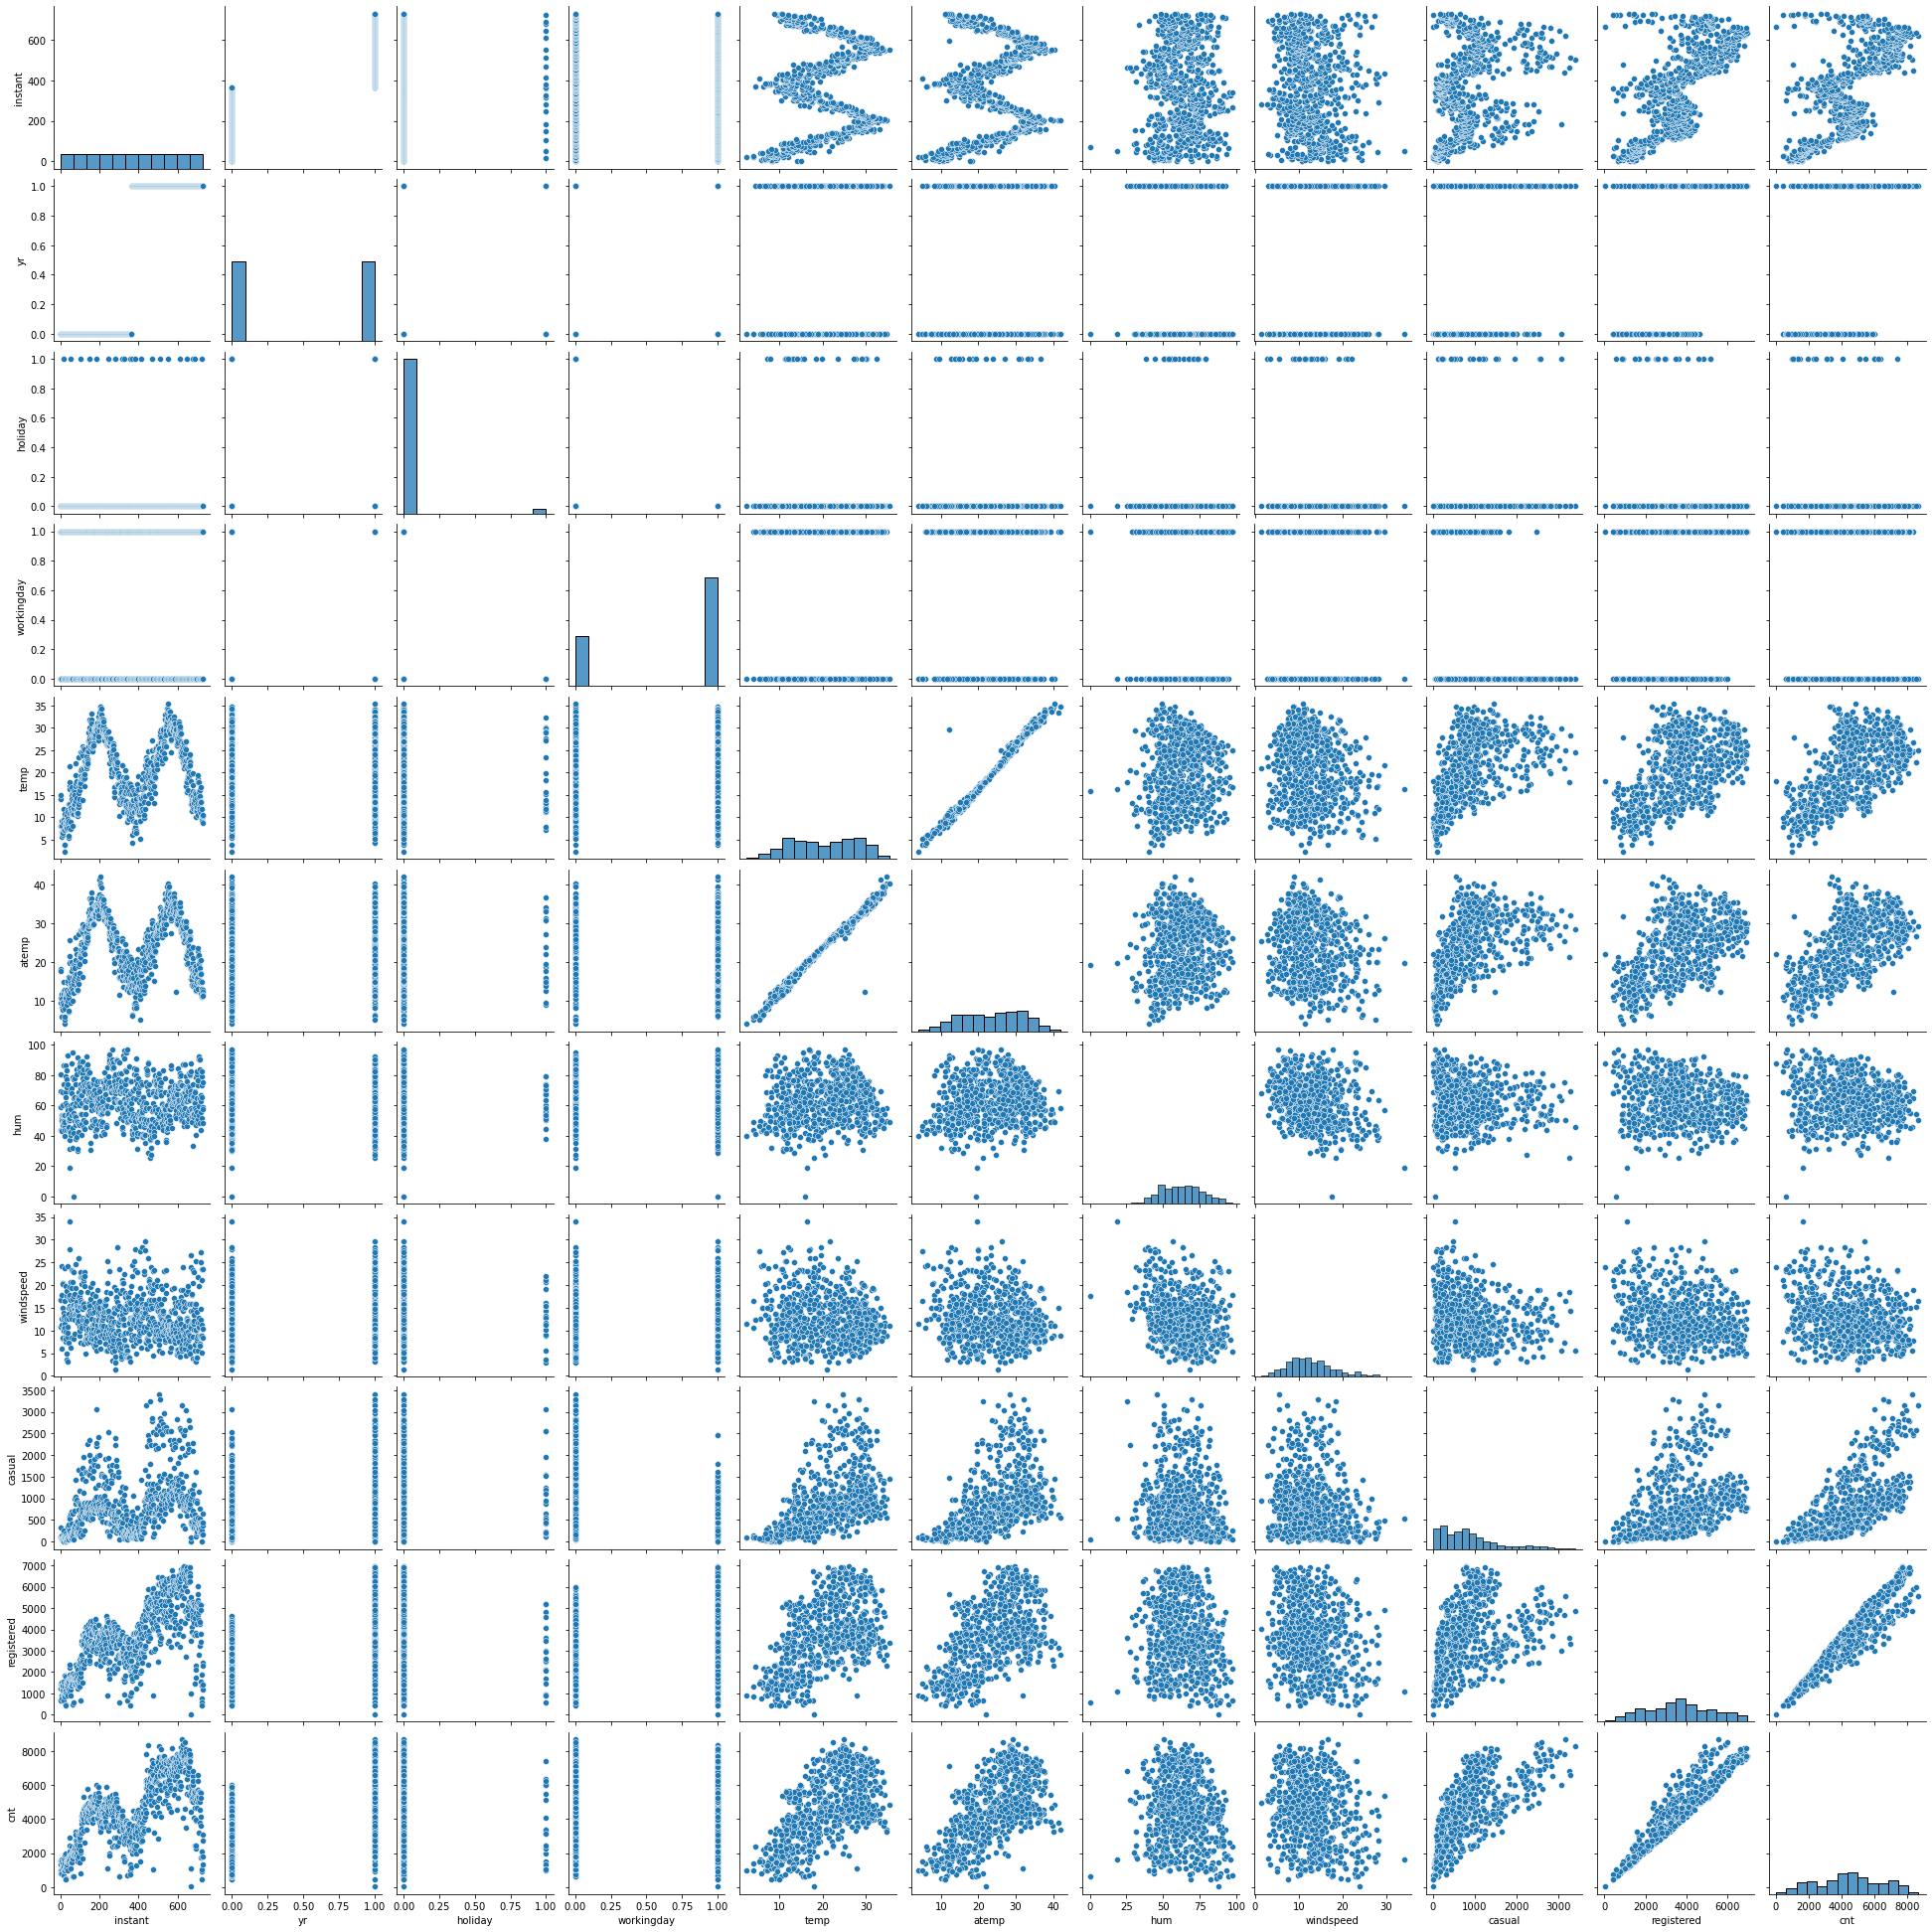

In [10]:
plt.figure(figsize=(4, 4))
sns.pairplot(boombikes)
plt.show()

In the above plot we can see how different variables vary w.r.t cnt and with respect to other variables.

#### Visualising Numeric Variables

Make a pairplot of all the numeric variables

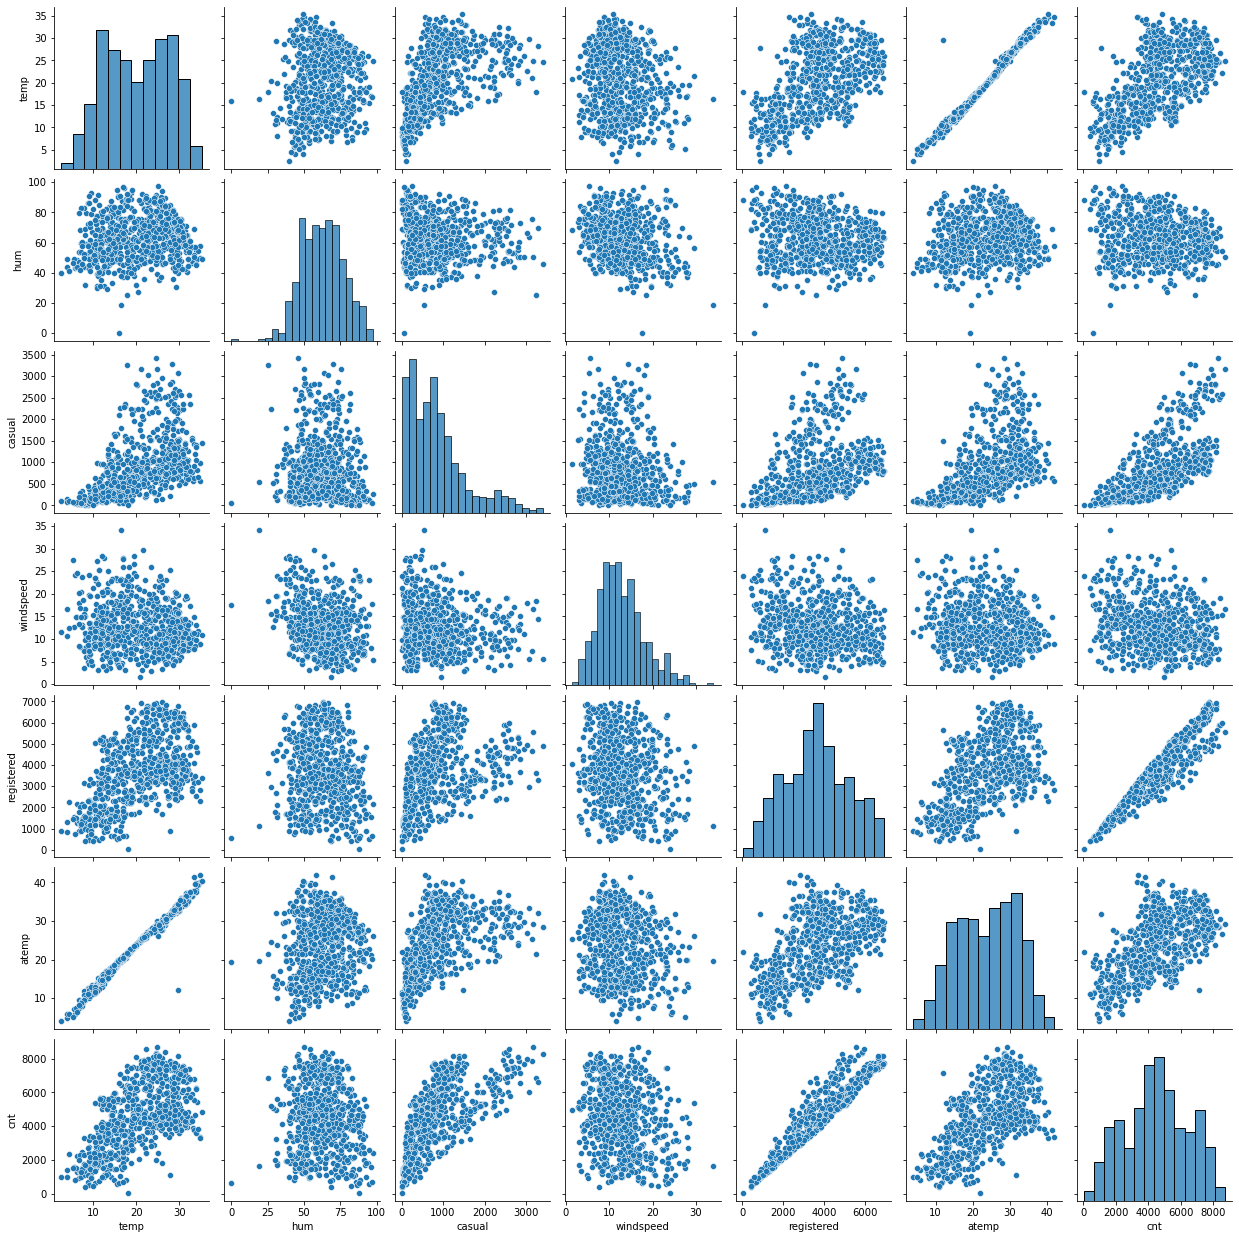

In [11]:
#Pairplot for numeric variables
sns.pairplot(boombikes, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

Some independent variables look positively correlated to the 'cnt' variable.
'cnt' has linear relationship with temp.

Visualising Categorical Variables using boxplots for some of these variables.

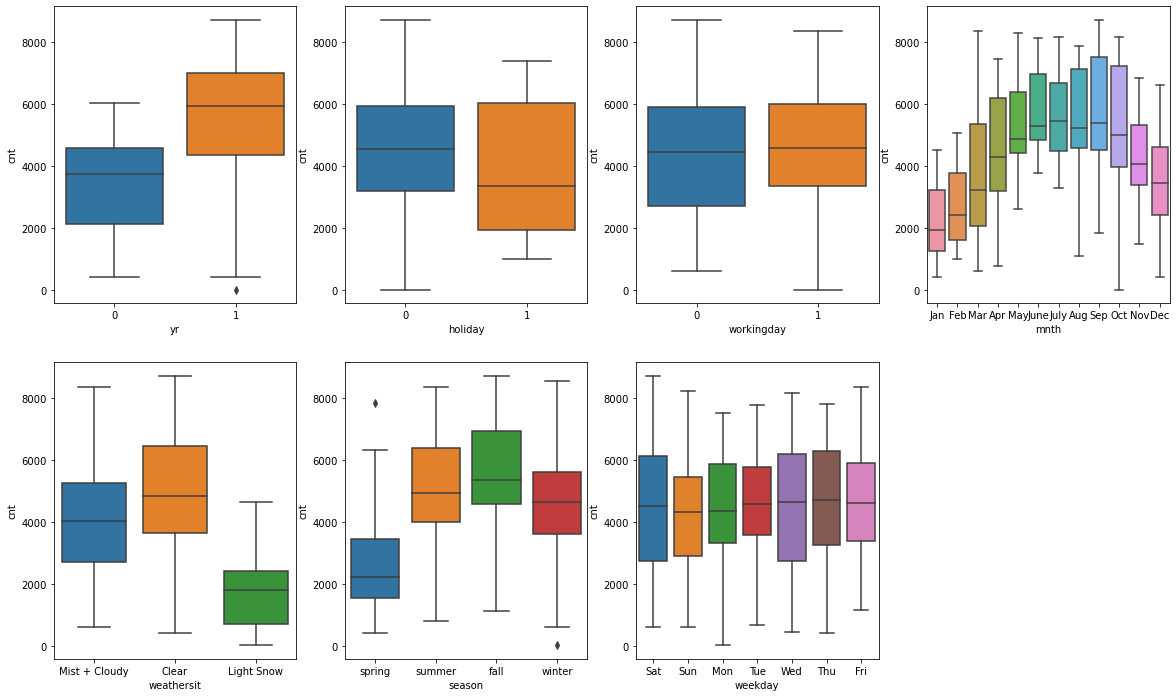

In [12]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

-  Bike Rentals are more in the year 2019 as compared to 2018.
-  During holidays the lower count of rentals goes very less ie less number of people use bikes.
-  More number of people use bikes in the month of Aug, Sept & Oct. Least number of people use bikes during Jan & Feb.
-  Bike Rentals are more in clear weather than in Light Snow.
-  Bike Rentals are more during the Fall and summer season and than in winter or spring.
-  Bike Rentals are more on Saturday,wednesday and thursday.

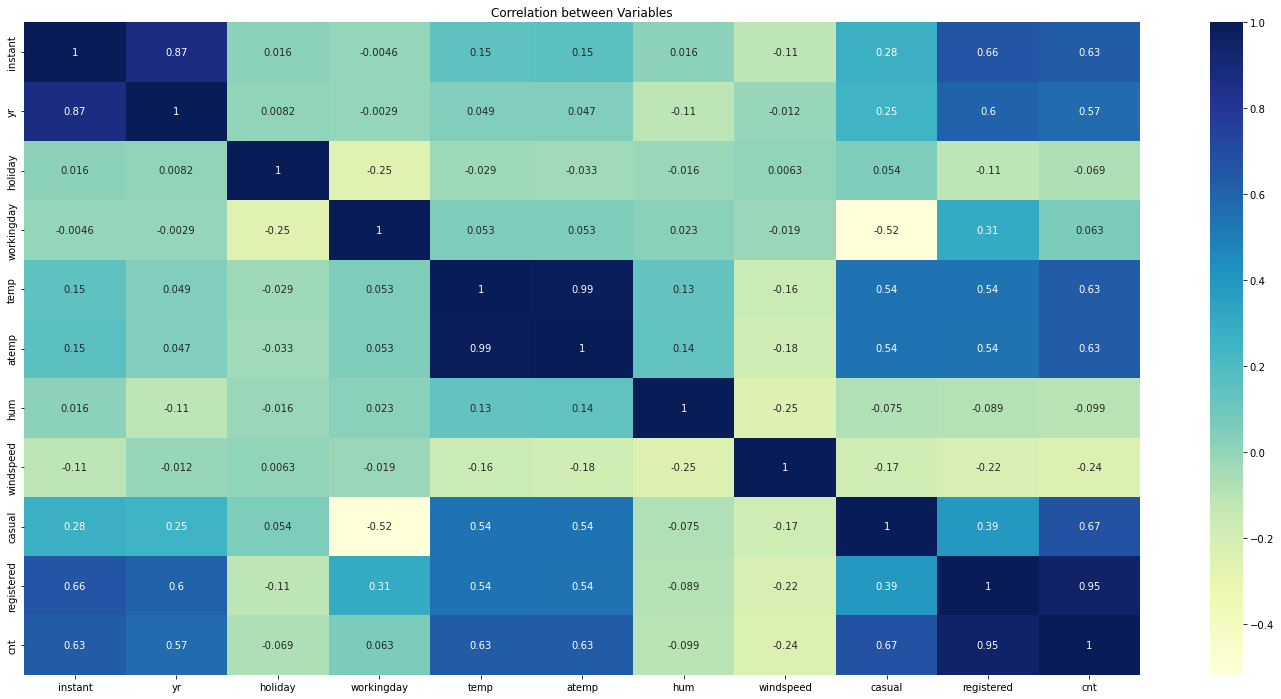

In [13]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(boombikes.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can infer from the pairplot and the heatmap that temp, atemp, casual, registered, instant variables are correlated to 'cnt' variable.

We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered.
-  instant is just like an index or serial no.
-  we already have yr and mnth column so 'dteday' is not required.
-  casual and registered are subset of 'cnt' column.

In [14]:
#drop unnecessary columns
boombikes=boombikes.drop(['instant','dteday','casual', 'registered'], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Checking datatypes of all the columns
boombikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 3: Data Preparation

- We have many columns with values as 'Spring', 'Summer','Jan', etc.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s. For this we need to do encoding.

- Encoding : 
    - Converting binary vars to 1/0. eg 1 is a 'Yes' and 0 is a 'No'.
    - Other categorical vars (eg season i.e. 4 category) to dummy vars 

#### Dummy Variables

The variable `mnths` has twelve levels. We need to convert these levels into integer as well. Similarly 'weekdays' have 7 levels, 'season' have 4 levels and 'weathersit' has 4 levels.

For this, we will use something called `dummy variables`.

In [16]:
#Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
mnths=pd.get_dummies(boombikes.mnth,drop_first=True)
weekdays=pd.get_dummies(boombikes.weekday,drop_first=True)
weather_sit=pd.get_dummies(boombikes.weathersit,drop_first=True)
seasons=pd.get_dummies(boombikes.season,drop_first=True)

#bike=pd.concat([seasons,bike], axis=1)

In [17]:
# Add the results to the original boombikes dataframe

boombikes = pd.concat([mnths,weekdays,weather_sit,seasons,boombikes], axis = 1)

In [18]:
boombikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
boombikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boombikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
#Number of rows and columns
boombikes.shape

(730, 30)

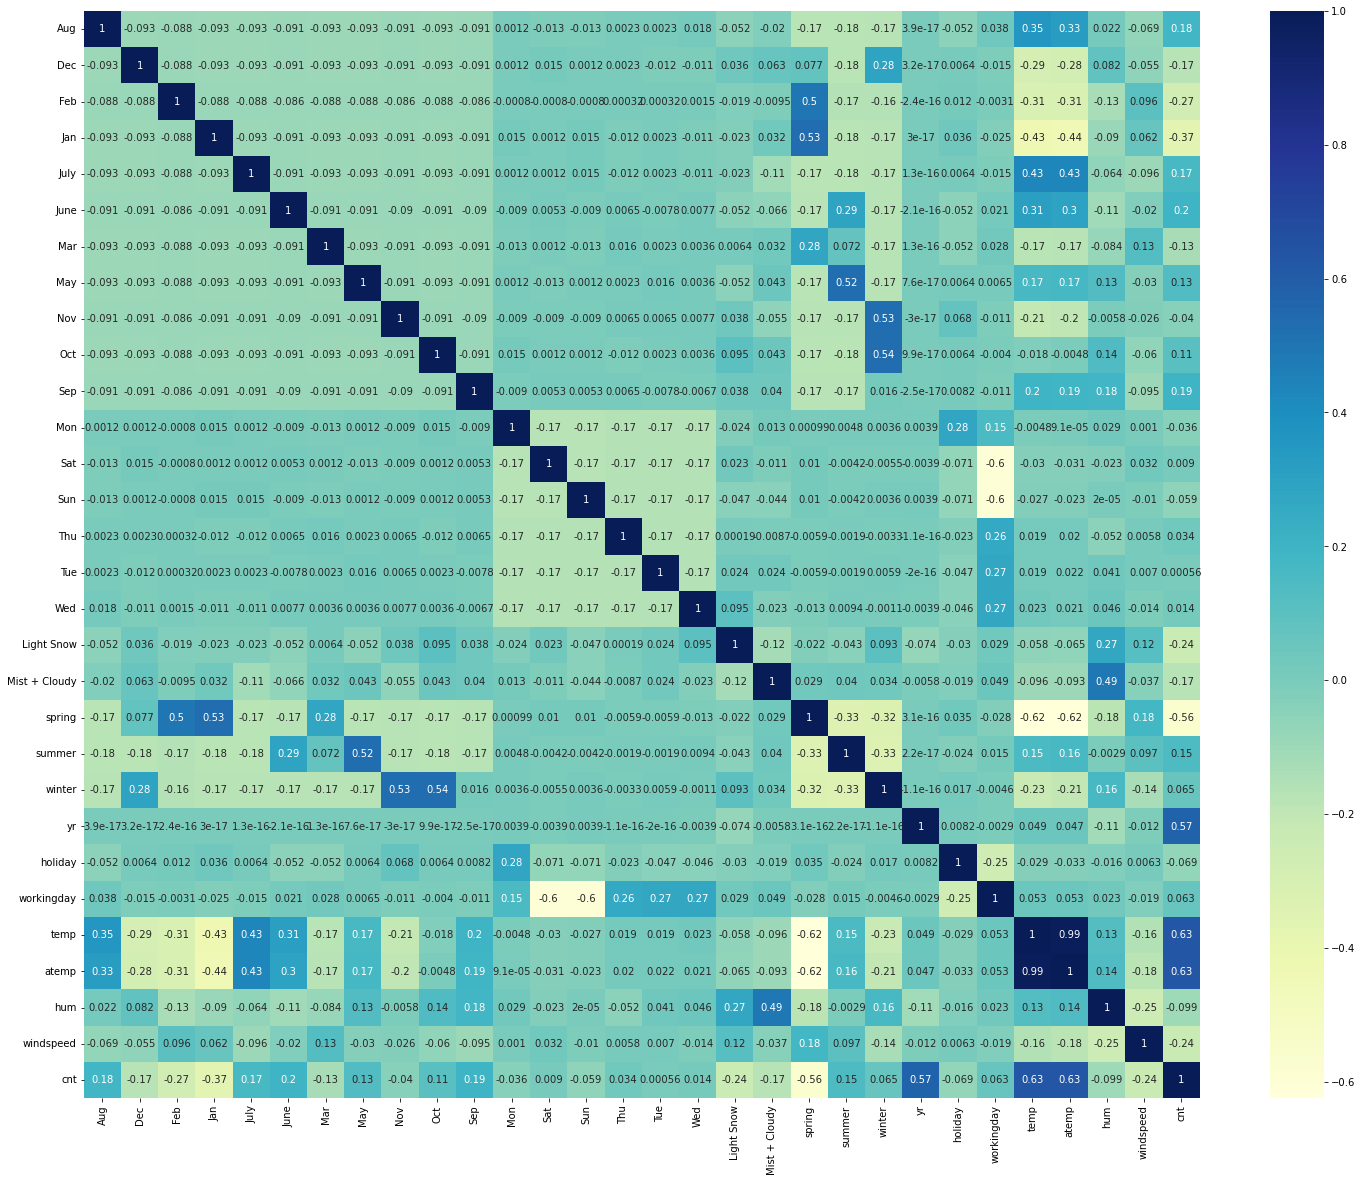

In [21]:
#Check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(boombikes.corr(), cmap='YlGnBu', annot = True)
plt.show()

We can see that temp is in good correlation with the 'cnt' variable. And seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

Before model building, you first need to perform the test-train split and scale the features.

In [22]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
boombike_train, boombike_test = train_test_split(boombikes, train_size = 0.7, random_state = 100)

In [23]:
#Rows and columns after split
print(boombike_train.shape)
print(boombike_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features 

As we know from the demonstration for Simple Linear Regression, scaling doesn't impact our model. Here we can see that many of the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalization) : Convert/Compress all your data between 0 & 1
2. Standardisation (mean-0, sigma-1) : Centers your data around mean 0 and standard deviation 1

This time, we will use MinMax scaling.

In [24]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt', 'atemp']

#Fit on data
boombike_train[num_vars] = scaler.fit_transform(boombike_train[num_vars])
boombike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [25]:
#Checking numeric variables(min and max) after scaling
boombike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__All the numeric variables are now mapped between 0 and 1__

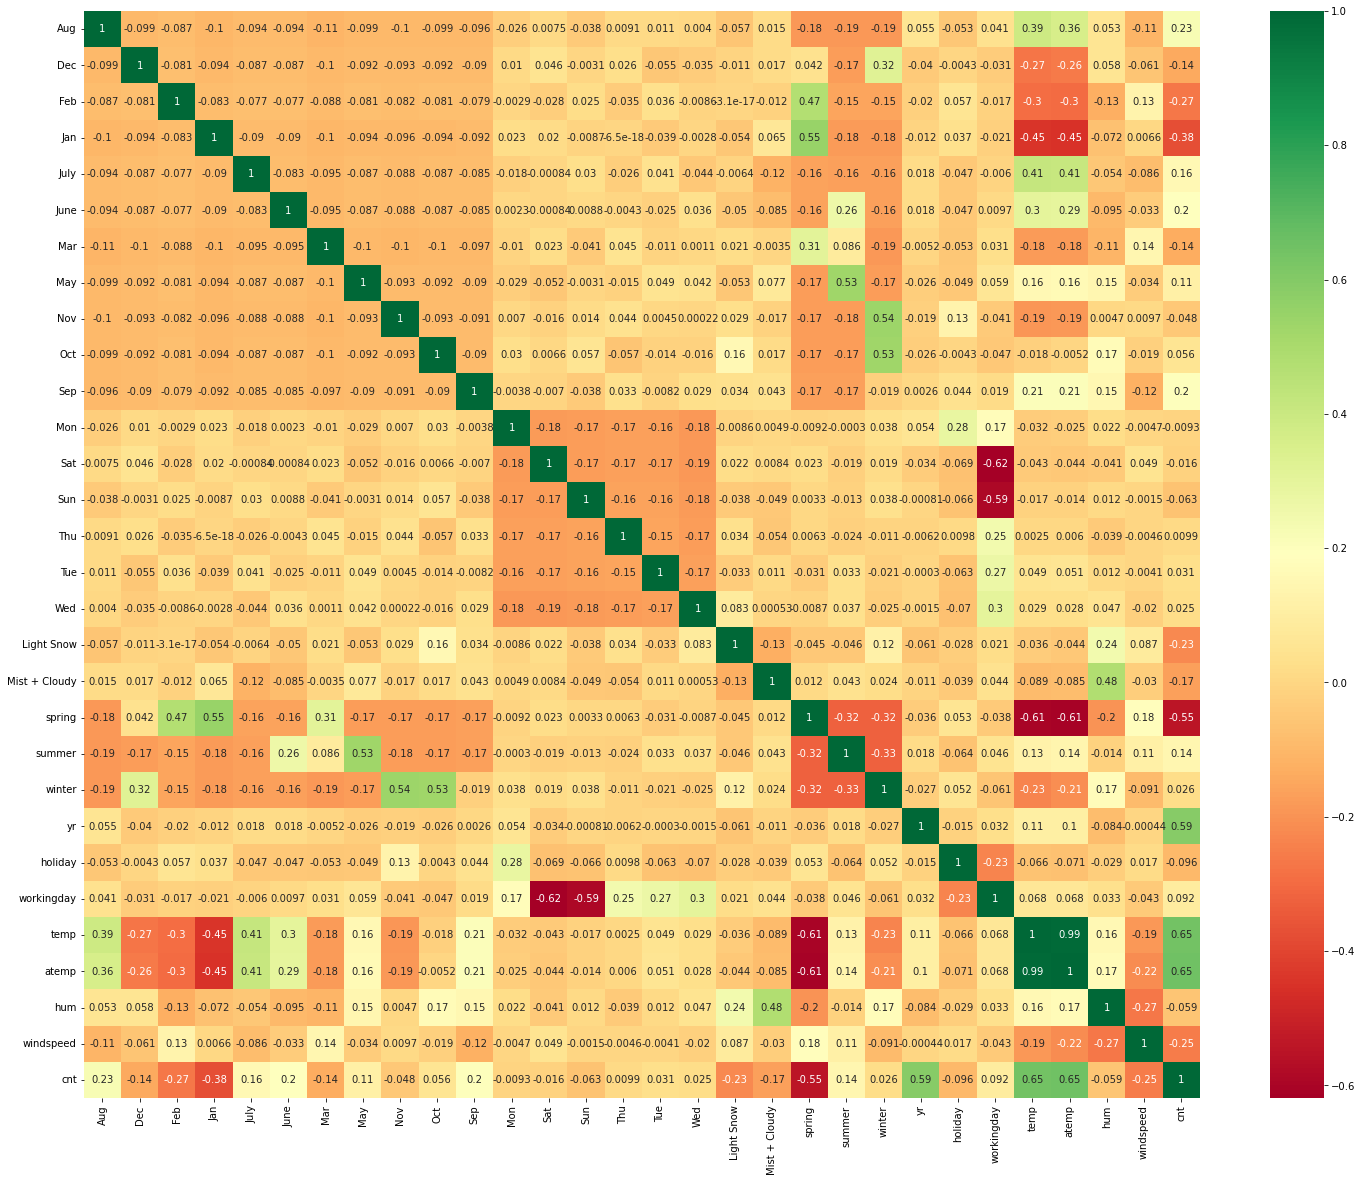

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(boombike_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [27]:
#Divide the data into X and y
y_train = boombike_train.pop('cnt')
X_train = boombike_train

y_train has only cnt column.

In [28]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [29]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981


## Step 5: Building a linear model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [30]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', False, 15),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 8),
 ('Nov', False, 5),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 16),
 ('Sat', True, 1),
 ('Sun', False, 10),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 9),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [33]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Aug', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [34]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed', 'spring', 'workingday', 'atemp'],
      dtype='object')

## Step 5: Building a linear model
To Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [38]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.20e-190
Time:                        21:37:26   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2279      0.027      8.425

__We note that the p value for 'Sat' is high i.e. 0.148. R squared value is 0.842__

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [39]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,14.36
9,temp,9.66
11,windspeed,3.63
4,Mist + Cloudy,2.13
7,yr,2.01
5,summer,1.83
6,winter,1.75
0,Aug,1.59
1,Sep,1.31
2,Sat,1.19


__We note that the p value for 'Sat' is high i.e. 0.148 & hum has high VIF. So first we will drop 'Sat'.__

In [41]:
#Drop Sat
X_train_new1 = X_train_rfe.drop(["Sat"], axis = 1)

Rebuilding the model without 'Sat'

In [42]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.50e-191
Time:                        21:38:04   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2322      0.027      8.623

In [43]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,14.31
8,temp,9.66
10,windspeed,3.59
3,Mist + Cloudy,2.13
6,yr,2.01
4,summer,1.83
5,winter,1.75
0,Aug,1.59
1,Sep,1.31
2,Light Snow,1.16


__R squared vaue is 0.841 which is fine. Also we not that p values for all variables are fine. But 'hum' has high VIF. So we will drop 'hum'__

In [45]:
#Drop hum
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [46]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.62e-187
Time:                        21:38:26   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1307      0.017      7.837

In [47]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [48]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.01
9,windspeed,3.10
6,yr,2.00
4,summer,1.82
0,Aug,1.58
3,Mist + Cloudy,1.49
5,winter,1.48
1,Sep,1.31
2,Light Snow,1.08
7,holiday,1.04


__Now R squared is 0.834. And we note that 'windspeed' has little high VIF and negative coefficient. So we will drop 'windspeed'.__

In [49]:
#Drop windspeed
X_train_new3 = X_train_lm2.drop(["windspeed"], axis = 1)

In [50]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.03e-181
Time:                        21:38:45   Log-Likelihood:                 479.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0698      0.014      5.126

__R squared value is 0.822.__

In [51]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.92
6,yr,1.94
4,summer,1.79
0,Aug,1.56
5,winter,1.46
3,Mist + Cloudy,1.45
1,Sep,1.29
2,Light Snow,1.06
7,holiday,1.03


__We note that 'temp' has high VIF. So we will drop 'temp'__

In [53]:
#Drop temp
X_train_new4 = X_train_lm3.drop(["temp"], axis = 1)

In [54]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 08 May 2022   Prob (F-statistic):           4.65e-99
Time:                        21:38:55   Log-Likelihood:                 282.98
No. Observations:                 510   AIC:                            -548.0
Df Residuals:                     501   BIC:                            -509.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3210      0.013     25.061

__Here we can see there is a huge drop on R-square and adjusted R-squared. So this wont be a good model.__

__So our final model is lm3 which is obtained by removing Sat, hum, windspeed variables columns__

In [55]:
X_train_lm3 = sm.add_constant(X_train_new3)

## Step 6: Residual Analysis of the train data

__So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.__

In [56]:
#Checking the shape of X_train_lm3
X_train_lm3.shape

(510, 10)

In [57]:
#Checking the columns for X_train_lm3
X_train_lm3.columns

Index(['const', 'Aug', 'Sep', 'Light Snow', 'Mist + Cloudy', 'summer',
       'winter', 'yr', 'holiday', 'temp'],
      dtype='object')

In [58]:
#y train predicted
y_train_pred = lm3.predict(X_train_lm3)

In [59]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

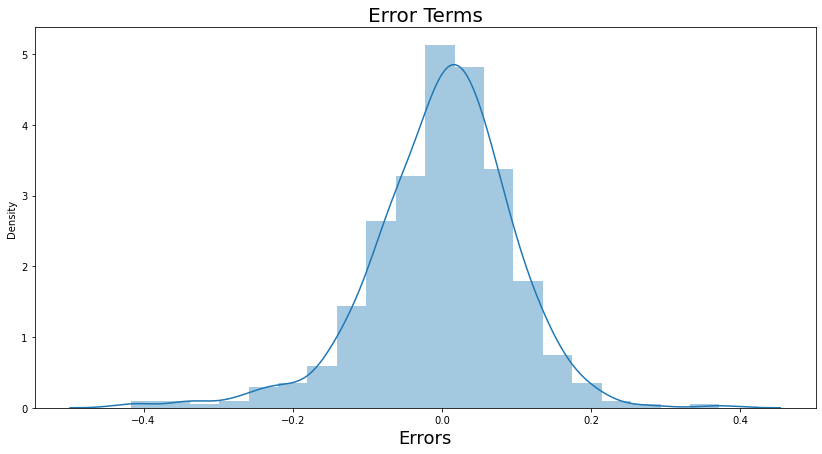

In [60]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

__We can see Error terms are normally distributed.__

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

__Applying the scaling on the test sets__

In [61]:
num_vars=['temp','hum','windspeed','cnt', 'atemp']

#tansform on data
boombike_test[num_vars] = scaler.transform(boombike_test[num_vars])
boombike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [62]:
boombike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            220 non-null    uint8  
 1   Dec            220 non-null    uint8  
 2   Feb            220 non-null    uint8  
 3   Jan            220 non-null    uint8  
 4   July           220 non-null    uint8  
 5   June           220 non-null    uint8  
 6   Mar            220 non-null    uint8  
 7   May            220 non-null    uint8  
 8   Nov            220 non-null    uint8  
 9   Oct            220 non-null    uint8  
 10  Sep            220 non-null    uint8  
 11  Mon            220 non-null    uint8  
 12  Sat            220 non-null    uint8  
 13  Sun            220 non-null    uint8  
 14  Thu            220 non-null    uint8  
 15  Tue            220 non-null    uint8  
 16  Wed            220 non-null    uint8  
 17  Light Snow     220 non-null    uint8  
 18  Mist + C

In [63]:
boombike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [64]:
y_test = boombike_test.pop('cnt')
X_test = boombike_test

In [65]:
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474


In [66]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [67]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_lm3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions

y_pred = lm3.predict(X_test_new)

In [72]:
#Evaluate R-square for test

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7968261322866325

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

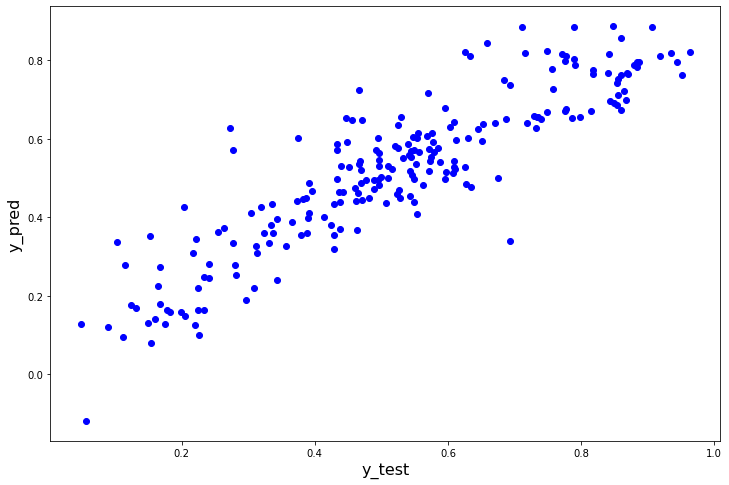

In [84]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16) 

#### Visualising the fit on the test set

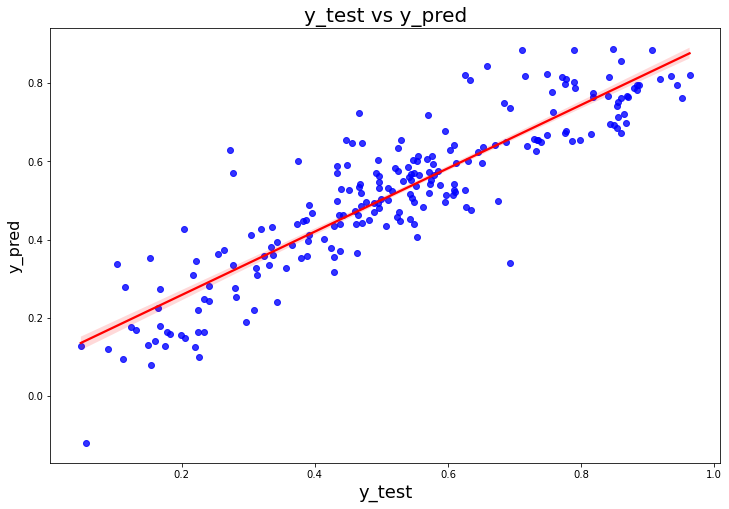

In [85]:
#Regression plot

plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

##### We can see that the equation of our best fitted line is:

##### count = 0.5390×temp + 0.0584xAug + 0.1237×Sept - 0.2964×Light Snow - 0.0796x(Mist + Cloudy) + 0.0968×summer + 0.1449×winter + 0.2313×yr - 0.0996×holiday

Final Result Comparison between Train model and Test:
- Train R^2 : 0.822
- Test R^2: 0.7968261
- Difference in R^2 between train and test: 3.06%
Yes! Its a best model
Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that temperature variable is having the highest coefficient 0.5390, which means if the temperature increases by one unit the number of bike rentals increases by 0.5390 units.
Similary we can see coefficients of other variables in the equation for best fitted line.
We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have  mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.
Business Goals:
- A US bike-sharing provider BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.
- We see weathersit variables has got negative coefficients for Mist +cloudy and Lightsnow weather... So we can give offers during that time.